<a href="https://colab.research.google.com/github/saieswarkr18/linear-regression/blob/main/Decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the dataset, prepare the data, train a Decision Tree classifier, and evaluate the model.

## Load the dataset

### Subtask:
Load the dataset again, this time specifying the correct file name from the available files.


**Reasoning**:
Load the specified dataset into a pandas DataFrame and display its head and info.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/bank-full.csv.zip')

# Display the first 5 rows and information
display(df.head())
display(df.info())

## Prepare the data

### Subtask:
Preprocess the data by handling any missing values, encoding categorical features, and splitting the data into training and testing sets.


**Reasoning**:
Check for missing values, identify and encode categorical features, and split the data into training and testing sets as per the instructions.



In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())

# Separate features (X) and target (y)
# The target variable 'y' was identified from the df.info() output in the previous step.
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Split the data into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Categorical columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

DataFrame after one-hot encoding:


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False



Shape of training data (X_train, y_train): (36168, 42) (36168,)
Shape of testing data (X_test, y_test): (9043, 42) (9043,)


## Train the decision tree model

### Subtask:
Build and train a Decision Tree classifier on the training data.


**Reasoning**:
Build and train a Decision Tree classifier using the training data.



In [10]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained model on the testing data using appropriate metrics.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.4f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 87.0508%
Precision: 0.4648
Recall: 0.4840
F1-score: 0.4742


**Reasoning**:
Correct the format specifier in the print statement to display the accuracy as a percentage with four decimal places.



## Visualize the decision tree

### Subtask:
Visualize the trained Decision Tree model.

**Reasoning**:
Visualize the Decision Tree to understand its structure and how it makes decisions. This can be done using `plot_tree` from `sklearn.tree`.

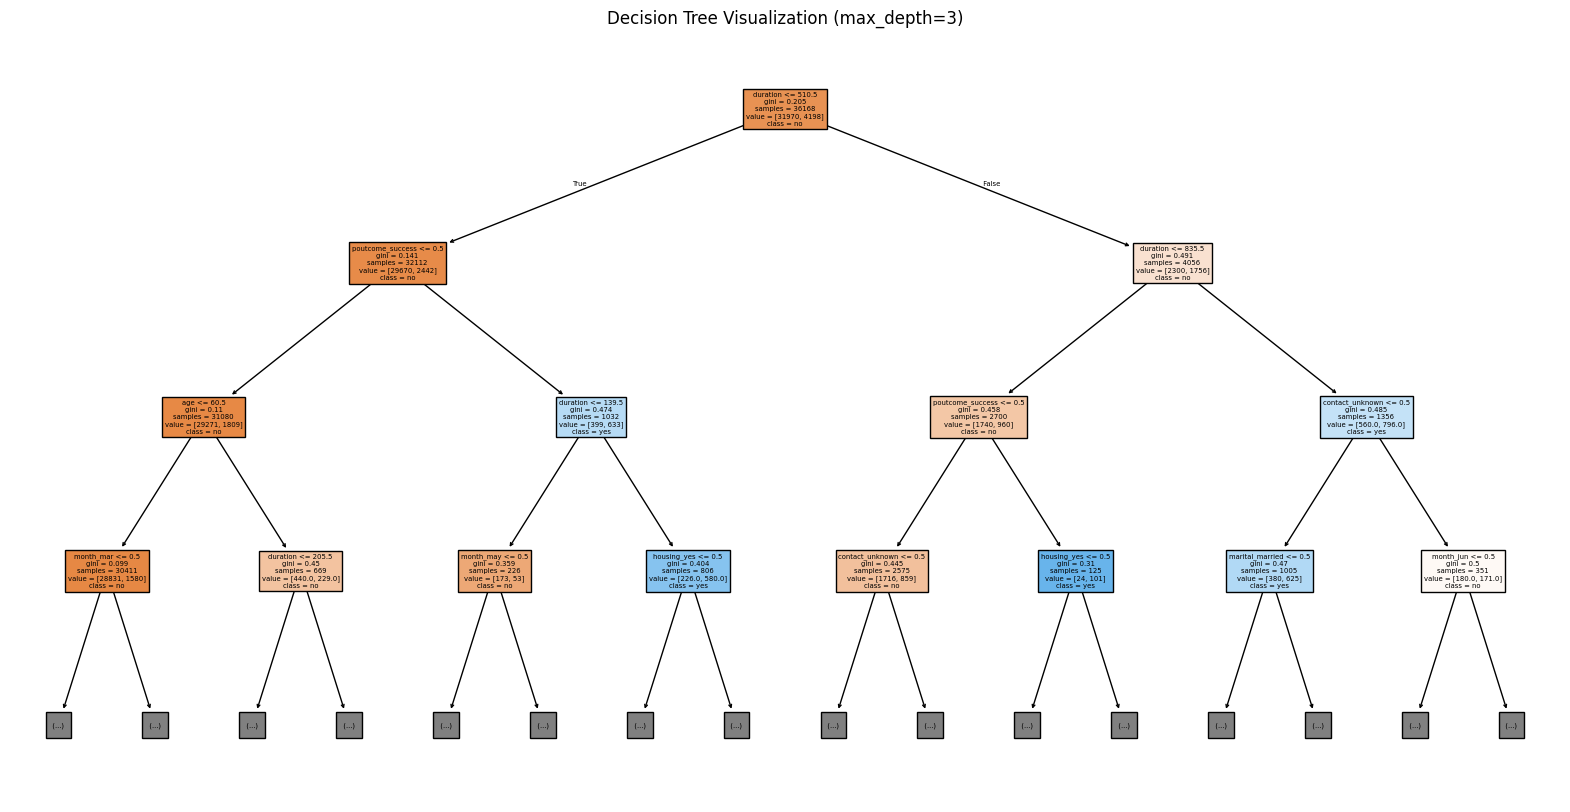

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree (first few levels for clarity)
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, max_depth=3, feature_names=X.columns, filled=True, class_names=['no', 'yes'])
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()